## Not a Binary Tree

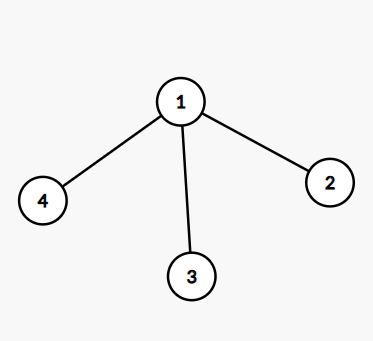           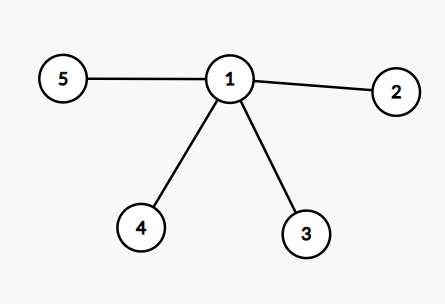

## Binary Tree

##  Binary Tree with 2 children  
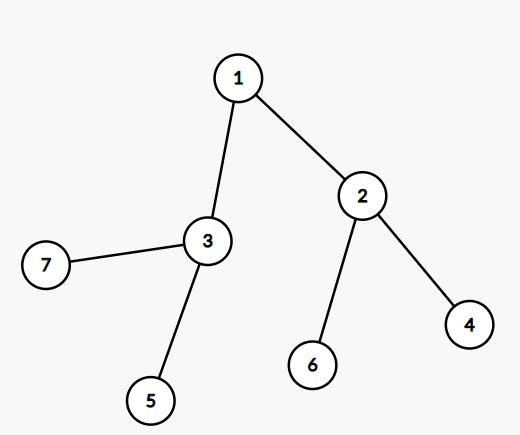 
  
 ## Binary Tree with 1 child
 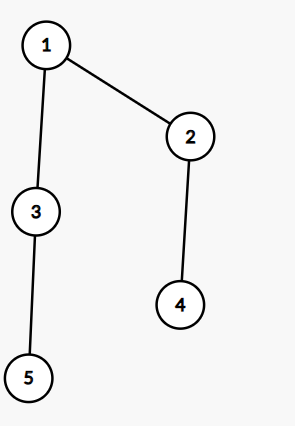     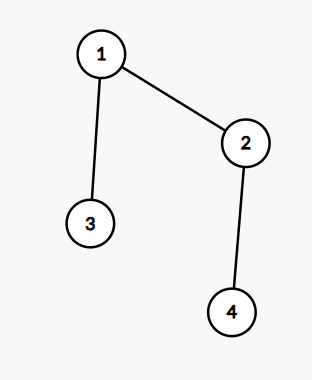         

 ## Binary Tree with 0 child
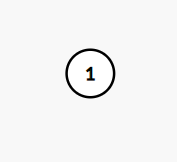 

## Full/ Strict Binary Tree --> 0 or 2 nodes
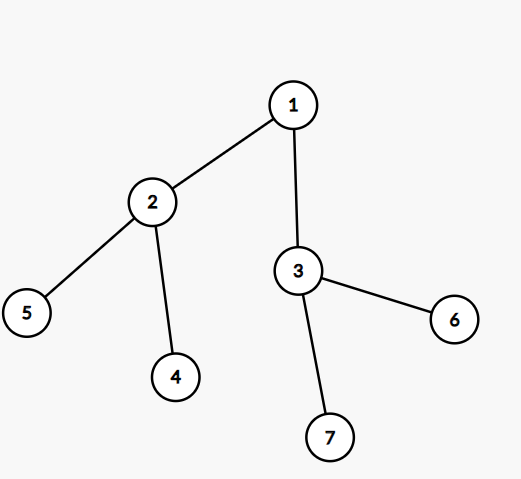   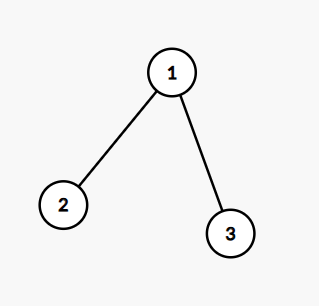  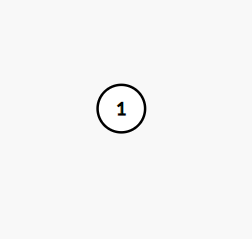


## Complete Binary Tree
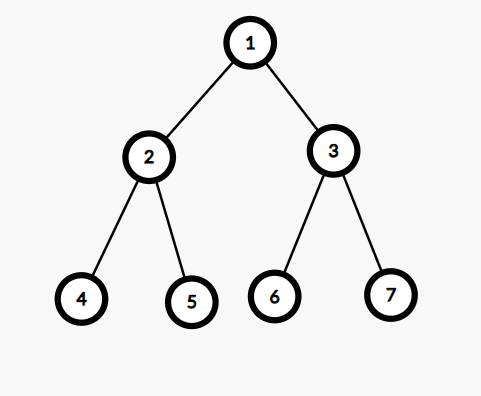


## Not a complete Binary Tree
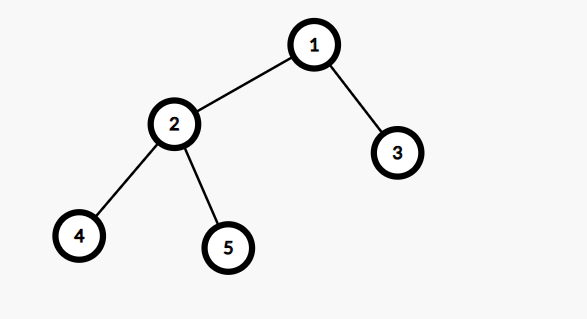


## Almost Complete Binary Tree

## Steps to create ACBT:

### Start from left then fill right. Every level should be completely filled before entering to the next level.
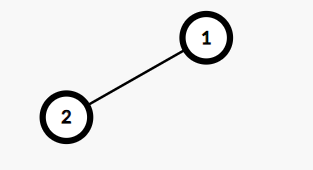
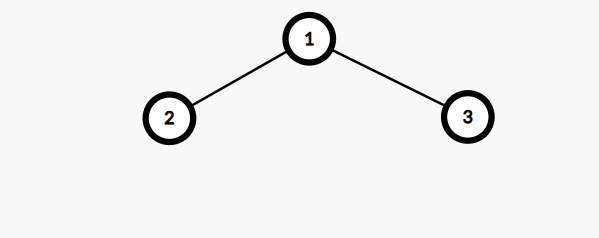             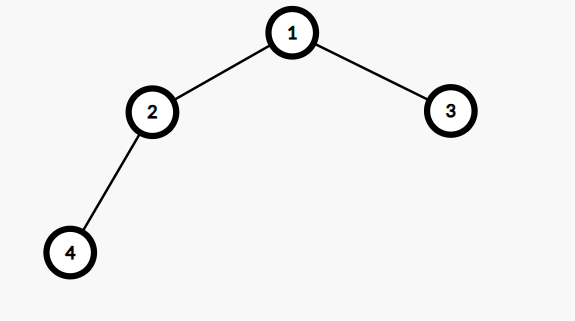
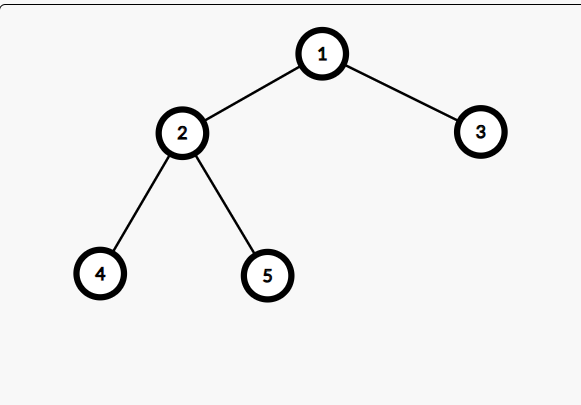             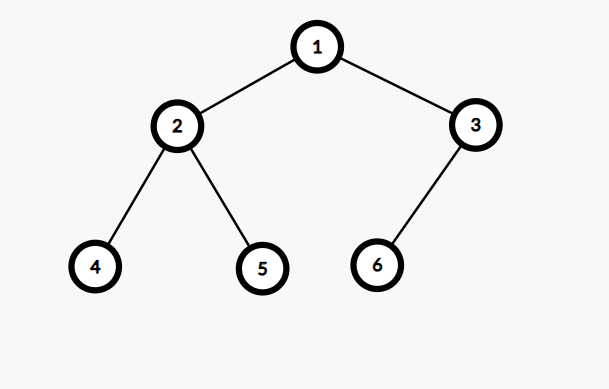
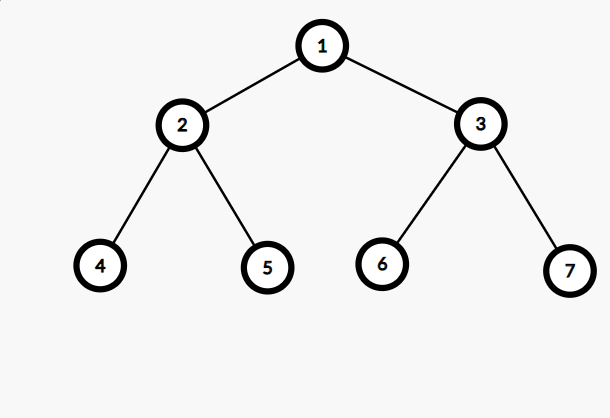     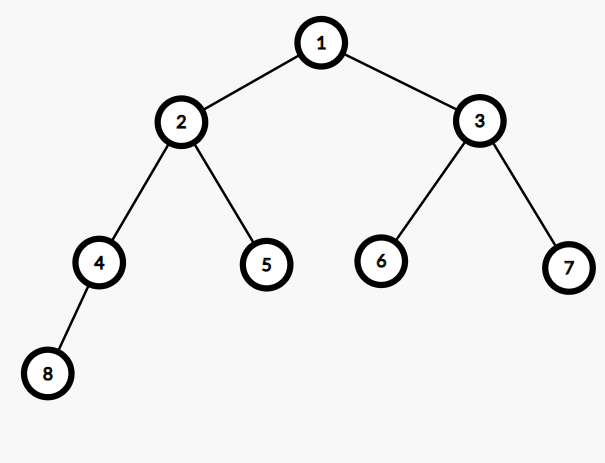
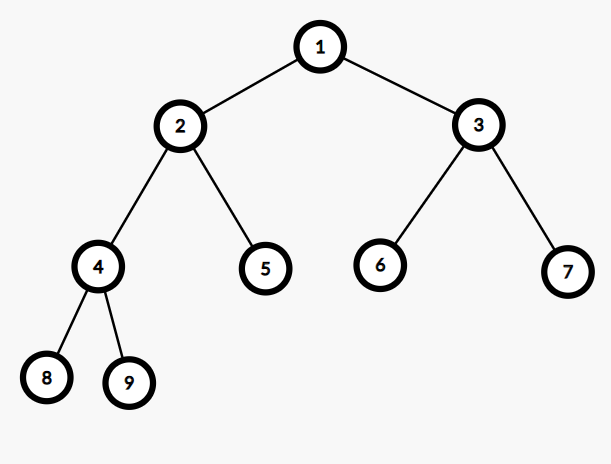    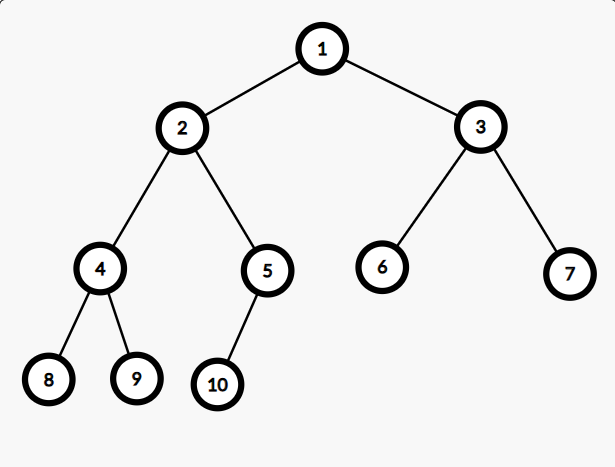
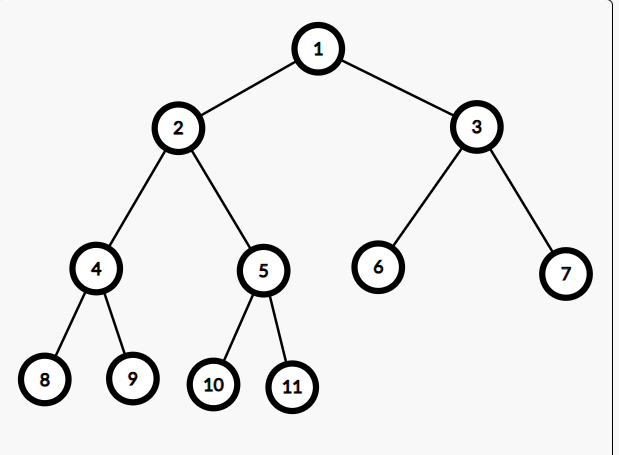  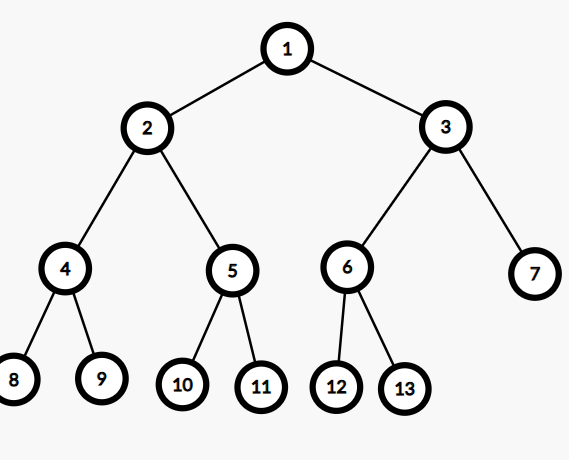
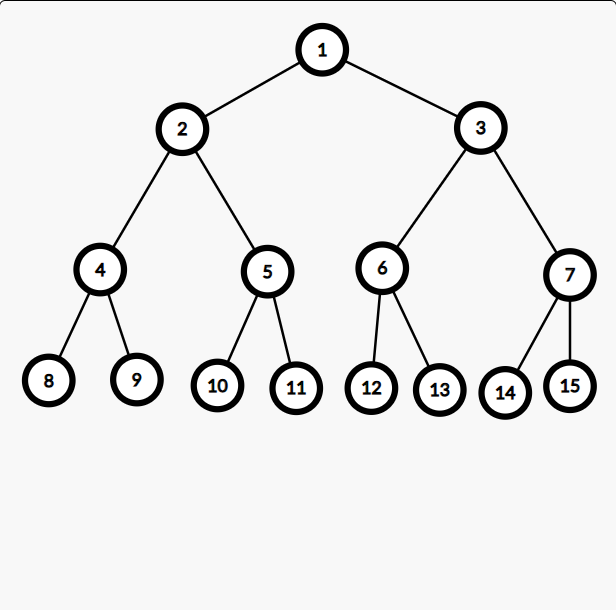

In [12]:
class MaxHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)
    else:
      raise ValueError("Invalid method. Choose 'one_by_one' or 'heapify'.")

  def insert(self, value):
    # add value to the end
    self.heap.append(value)
    # fix heap property (bottom to top)
    self._heapify_up(len(self.heap) - 1)

  def delete(self):
    if not self.heap:
      return None
    # swap root with last element and remove last element
    self._swap(0, len(self.heap) - 1)
    root = self.heap.pop()
    # fix heap property (top to bottom)
    self._heapify_down(0)
    return root

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_heapify(self, H):
    self.heap = H
    # build heap property (top to bottom)
    for i in range(len(H) // 2 - 1, -1, -1):
      self._heapify_down(i)

  def _heapify_up(self, index):
    parent_index = (index - 1) // 2
    if index > 0 and self.heap[index] > self.heap[parent_index]:
      self._swap(index, parent_index)
      self._heapify_up(parent_index)

  def _heapify_down(self, index):
    largest = index
    left = 2 * index + 1
    right = 2 * index + 2
    if left < len(self.heap) and self.heap[left] > self.heap[largest]:
      largest = left
    if right < len(self.heap) and self.heap[right] > self.heap[largest]:
      largest = right
    if largest != index:
      self._swap(index, largest)
      self._heapify_down(largest)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def print_heap(self):
    # print heap in list format
    print(", ".join(map(str, self.heap)))
    # print heap in space-separated format
    print(" ".join(map(str, self.heap)))


# example
H = [50, 55, 60, 65, 70, 75, 13, 23, 5, 100]

# construct heap using one-by-one method
max_heap_one_by_one = MaxHeap(H, method='one_by_one')
print("Heap (One-by-One):")
max_heap_one_by_one.print_heap()

# construct heap using heapify method
max_heap_heapify = MaxHeap(H, method='heapify')
print("Heap (Heapify):")
max_heap_heapify.print_heap()

Heap (One-by-One):
100, 75, 70, 50, 65, 55, 13, 23, 5, 60
100 75 70 50 65 55 13 23 5 60
Heap (Heapify):
100, 70, 75, 65, 55, 60, 13, 23, 5, 50
100 70 75 65 55 60 13 23 5 50


In [13]:
parent = {
    # comp 1
    'A': 'A',
    'B': 'A',
    'C': 'B',
    # comp 2
    'F': 'F',
    'G': 'F',
    'H': 'G',
    'D': 'H',
    'E': 'D'
}

In [14]:
def find(node):
  while parent[node] != node:
    node = parent[node]
  return node


print(find('E'))
print(find('D'))
print(find('B'))
print(find('H'))

F
F
A
F


In [17]:
def union(u, v):
  root1 = find(u)
  root2 = find(v)
  if root1 != root2:
    parent[root2] = root1
    print('✅merge successful')
  else:
    print('❌merge rejected')


# union('D', 'E')
union('D', 'C')

❌merge rejected


In [16]:
parent

{'A': 'F',
 'B': 'A',
 'C': 'B',
 'F': 'F',
 'G': 'F',
 'H': 'G',
 'D': 'H',
 'E': 'D'}

## Kruskal's Algorithm using `UnionFind`

In [20]:
def print_ufs_info(ufs):
  """ https://csacademy.com/app/graph_editor/ """
  display('print_ufs_info: 👇')
  for u in ufs.parent:
    print(u)
  for u in ufs.parent:
    print(u, ufs.parent[u])


def print_graph_info(adjacency_list):
  """ https://csacademy.com/app/graph_editor/ """
  display('print_graph_info: 👇')
  for u in adjacency_list:
    print(u)
  for u in adjacency_list:
    for v, weight in adjacency_list[u]:
      print(u, v, weight)


def print_mst_info(vertices, mst):
  """ https://csacademy.com/app/graph_editor/ """
  display('print_mst_info: 👇')
  for u in vertices:
    print(u)
  for u, v, weight in mst:
    print(u, v, weight)

In [24]:
class UnionFind:
  def __init__(self, vertices):
    self.parent = {u: u for u in vertices}

  def find(self, node):
    while self.parent[node] != node:
      node = self.parent[node]
    return node

  def union(self, u, v):
    root1 = self.find(u)
    root2 = self.find(v)
    if root1 != root2:
      self.parent[root2] = root1
      return True
    return False


def kruskal(adjacency_list):
  print_graph_info(adjacency_list)
  mst = []

  edges = []
  for u in adjacency_list:
    for v, weight in adjacency_list[u]:
      edges.append((weight, u, v))
  edges.sort()

  ufs = UnionFind(adjacency_list)
  for weight, u, v in edges:
    if ufs.union(u, v):
      mst.append((u, v, weight))
  print_mst_info(adjacency_list, mst)
  print_ufs_info(ufs)
  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

kruskal(adjacency_list) == [(1, 2, 4), (0, 2, 6), (2, 3, 11)]

'print_graph_info: 👇'

0
1
2
3
0 1 10
0 2 6
1 0 10
1 3 15
1 2 4
2 0 6
2 1 4
2 3 11
3 1 15
3 2 11


'print_mst_info: 👇'

0
1
2
3
1 2 4
0 2 6
2 3 11


'print_ufs_info: 👇'

0
1
2
3
0 0
1 0
2 1
3 0


True

In [25]:
adjacency_list = {
    'A': [('C', 3), ('D', 3), ('B', 2)],
    'B': [('A', 2), ('C', 4), ('E', 3)],
    'C': [('A', 3), ('B', 4), ('F', 6), ('E', 1)],
    'D': [('A', 3), ('F', 7)],
    'E': [('B', 3), ('C', 1), ('F', 8)],
    'F': [('D', 7), ('E', 8), ('G', 9), ('C', 6)],
    'G': [('F', 9)]
}

kruskal(adjacency_list) == [('C', 'E', 1),
                            ('A', 'B', 2),
                            ('A', 'C', 3),
                            ('A', 'D', 3),
                            ('C', 'F', 6),
                            ('F', 'G', 9)]

'print_graph_info: 👇'

A
B
C
D
E
F
G
A C 3
A D 3
A B 2
B A 2
B C 4
B E 3
C A 3
C B 4
C F 6
C E 1
D A 3
D F 7
E B 3
E C 1
E F 8
F D 7
F E 8
F G 9
F C 6
G F 9


'print_mst_info: 👇'

A
B
C
D
E
F
G
C E 1
A B 2
A C 3
A D 3
C F 6
F G 9


'print_ufs_info: 👇'

A
B
C
D
E
F
G
A A
B A
C A
D A
E C
F A
G A


True

In [26]:
# Returns an undirected version of the adjacency list where for every u-v link there is a v-u link
def get_undirected(adjacency_list):
  # copy the original adjacency list
  undirected_list = {vertex: neighbors[:] for vertex, neighbors in adjacency_list.items()}

  for vertex in adjacency_list:
    for neighbor, weight in adjacency_list[vertex]:
      # add vertex to neighbor's list if not already present
      found = False
      for adj_vertex, _ in undirected_list[neighbor]:  # _ represents the weight
        if adj_vertex == vertex:
          found = True
          break
      if not found:
        undirected_list[neighbor].append((vertex, weight))

  # sort neighbors of each vertex based on vertex index (0)
  for vertex in undirected_list:
    undirected_list[vertex].sort(key=lambda x: x[0])  # x: (vertex, weight)

  return undirected_list

In [27]:
adjacency_list = {
    1: [(2, 1), (5, 3)],
    2: [(3, 7), (5, 2)],
    3: [(5, 10), (4, 2)],
    4: [(5, 5)],
    5: []
}
adjacency_list = get_undirected(adjacency_list)
kruskal(adjacency_list)

'print_graph_info: 👇'

1
2
3
4
5
1 2 1
1 5 3
2 1 1
2 3 7
2 5 2
3 2 7
3 4 2
3 5 10
4 3 2
4 5 5
5 1 3
5 2 2
5 3 10
5 4 5


'print_mst_info: 👇'

1
2
3
4
5
1 2 1
2 5 2
3 4 2
4 5 5


'print_ufs_info: 👇'

1
2
3
4
5
1 3
2 1
3 3
4 3
5 1


[(1, 2, 1), (2, 5, 2), (3, 4, 2), (4, 5, 5)]

## GRAPH vs MST vs UFS
  ![](./media/graph.png) ![](./media/graph%20(1).png) ![](./media/graph%20(2).png)

## Heap Construction

In [5]:
class MaxHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)
    else:
      raise Exception('Invalid method')

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_heapify(self, H):
    self.heap = H
    middle_index = len(H) // 2 - 1
    for i in range(middle_index, -1, -1):
      self._heapify_down(i)

  def insert(self, value):
    # add value at the end
    self.heap.append(value)
    # fix heap bottom to top
    self._heapify_up(len(self.heap)-1)

  def delete(self):
    if len(self.heap) == 0:
      return None
    self._swap(0, len(self.heap)-1)
    root = self.heap.pop()
    self._heapify_down(0)
    return root

  def _heapify_up(self, index):
    parent_index = (index-1) // 2
    if index > 0 and self.heap[index] > self.heap[parent_index]:
      self._swap(index, parent_index)
      self._heapify_up(parent_index)

  def _heapify_down(self, index):
    largest = index
    left = 2 * index+1
    right = 2 * index + 2
    if left < len(self.heap) and self.heap[left] > self.heap[largest]:
      largest = left
    if right < len(self.heap) and self.heap[right] > self.heap[largest]:
      largest = right
    if largest != index:
      self._swap(index, largest)
      self._heapify_down(largest)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def print_heap(self):
    print(' '.join(map(str, self.heap)))


# test
H = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# construct heap using one-by-one method
max_heap = MaxHeap(H, method='one_by_one')
print("Heap (One-by-One):")
max_heap.print_heap()

print(max_heap.delete())
print(max_heap.delete())
print(max_heap.delete())
print(max_heap.delete())
print(max_heap.delete())
print(max_heap.delete())
print(max_heap.delete())
print(max_heap.delete())
print(max_heap.delete())
print(max_heap.delete())
print(max_heap.delete())

# # construct heap using heapify method
# max_heap_heapify = MaxHeap(H, method='heapify')
# print("Heap (Heapify):")
# max_heap_heapify.print_heap()

Heap (One-by-One):
100 90 60 70 80 20 50 10 40 30
100
90
80
70
60
50
40
30
20
10
None


In [8]:
class MinHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)
    else:
      raise Exception('Invalid method')

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_heapify(self, H):
    self.heap = H
    middle_index = len(H) // 2 - 1
    for i in range(middle_index, -1, -1):
      self._heapify_down(i)

  def insert(self, value):
    # add value at the end
    self.heap.append(value)
    # fix heap bottom to top
    self._heapify_up(len(self.heap)-1)

  def delete(self):
    if len(self.heap) == 0:
      return None
    self._swap(0, len(self.heap)-1)
    root = self.heap.pop()
    self._heapify_down(0)
    return root

  def _heapify_up(self, index):
    parent_index = (index-1) // 2
    if index > 0 and self.heap[index] < self.heap[parent_index]:
      self._swap(index, parent_index)
      self._heapify_up(parent_index)

  def _heapify_down(self, index):
    smallest = index
    left = 2 * index+1
    right = 2 * index + 2
    if left < len(self.heap) and self.heap[left] < self.heap[smallest]:
      smallest = left
    if right < len(self.heap) and self.heap[right] < self.heap[smallest]:
      smallest = right
    if smallest != index:
      self._swap(index, smallest)
      self._heapify_down(smallest)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def print_heap(self):
    print(' '.join(map(str, self.heap)))


# test
H = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]

# construct heap using one-by-one method
min_heap = MinHeap(H, method='one_by_one')
print("Heap (One-by-One):")
min_heap.print_heap()

print(min_heap.delete())
print(min_heap.delete())
print(min_heap.delete())
print(min_heap.delete())
print(min_heap.delete())
print(min_heap.delete())
print(min_heap.delete())
print(min_heap.delete())
print(min_heap.delete())
print(min_heap.delete())
print(min_heap.delete())
# # construct heap using heapify method
# min_heap_heapify = MinHeap(H, method='heapify')
# print("Heap (Heapify):")
# min_heap_heapify.print_heap()

Heap (One-by-One):
10 20 50 40 30 90 60 100 70 80
10
20
30
40
50
60
70
80
90
100
None


## Heap Sort using min heap

In [19]:
class MinHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)
    else:
      raise Exception('Invalid method')

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_heapify(self, H):
    self.heap = H
    middle_index = len(H) // 2 - 1
    for i in range(middle_index, -1, -1):
      self._heapify_down(i)

  def insert(self, value):
    # add value at the end
    self.heap.append(value)
    # fix heap bottom to top
    self._heapify_up(len(self.heap)-1)

  def delete(self):
    if len(self.heap) == 0:
      return None
    self._swap(0, len(self.heap)-1)
    root = self.heap.pop()
    self._heapify_down(0)
    return root

  def _heapify_up(self, index):
    parent_index = (index-1) // 2
    if index > 0 and self.heap[index] < self.heap[parent_index]:
      self._swap(index, parent_index)
      self._heapify_up(parent_index)

  def _heapify_down(self, index):
    smallest = index
    left = 2 * index+1
    right = 2 * index + 2
    if left < len(self.heap) and self.heap[left] < self.heap[smallest]:
      smallest = left
    if right < len(self.heap) and self.heap[right] < self.heap[smallest]:
      smallest = right
    if smallest != index:
      self._swap(index, smallest)
      self._heapify_down(smallest)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def print_heap(self):
    print(' '.join(map(str, self.heap)))

  def heap_sort(self):
    temp_heap = self.heap.copy()
    output = []
    for i in range(len(self.heap)):
      root = self.delete()
      output.append(root)
    self.heap = temp_heap
    return output


# test
H = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]

# construct heap using one-by-one method
min_heap = MinHeap(H, method='one_by_one')
print("Heap (One-by-One):")
min_heap.print_heap()

min_heap.heap_sort()
min_heap.print_heap()

Heap (One-by-One):
10 20 50 40 30 90 60 100 70 80


[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

10 20 50 40 30 90 60 100 70 80


## Revision

In [20]:
# Utility functions
def print_ufs_info(ufs):
  display('Print ufs:')
  for u in ufs.parent:
    print(u)

  for u in ufs.parent:
    print(u, ufs.parent[u])


def print_graph_info(adjacency_list):
  display('print graph:')
  for u in adjacency_list:
    print(u)
  for u in adjacency_list:
    for v, weight in adjacency_list[u]:
      print(u, v, weight)


def print_mst_info(vertices, mst):
  display('print mst:')
  for u in vertices:
    print(u)
  for u, v, weight in mst:
    print(u, v, weight)

In [25]:
class UnionFind:
  def __init__(self, vertices):
    self.parent = {u: u for u in vertices}

  def find(self, node):
    while self.parent[node] != node:
      node = self.parent[node]
    return node

  def union(self, u, v):
    root1 = self.find(u)
    root2 = self.find(v)
    if root1 != root2:
      self.parent[root2] = root1


def kruskal(adjacency_list):
  print_graph_info(adjacency_list)

  mst = []

  edges = []
  for u in adjacency_list:
    for v, weight in adjacency_list[u]:
      edges.append((weight, u, v))
  edges.sort()

  ufs = UnionFind(adjacency_list)

  for weight, u, v in edges:
    if ufs.union(u, v):
      mst.append((u, v, weight))

  print_mst_info(adjacency_list, mst)
  print_ufs_info(ufs)
  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

kruskal(adjacency_list)  # == [(1, 2, 4), (0, 2, 6), (2, 3, 11)]

'print graph:'

0
1
2
3
0 1 10
0 2 6
1 0 10
1 3 15
1 2 4
2 0 6
2 1 4
2 3 11
3 1 15
3 2 11


'print mst:'

0
1
2
3


'Print ufs:'

0
1
2
3
0 0
1 0
2 1
3 0


[]

In [32]:
class MaxHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)
    else:
      raise Exception('Method is invalid')

  def _build_heap_one_by_one(self, H):
    for value in H:
      self._insert(value)

  def _build_heap_heapify(self, H):
    # add all elem to heap
    self.heap = H
    # heapify
    for i in range(len(H)//2, -1, -1):
      self._heapify_down(i)

  def _insert(self, value):
    # append to heap
    self.heap.append(value)
    # heapify bottom to top
    self._heapify_up(len(self.heap)-1)

  def _heapify_up(self, index):
    parent_index = (index - 1)//2
    if index > 0 and self.heap[index] > self.heap[parent_index]:
      # swap the nodes
      self._swap(index, parent_index)
      # heapify on parent
      self._heapify_up(parent_index)

  def _heapify_down(self, index):
    largest = index
    left = 2 * index + 1
    right = 2 * index + 2
    if left < len(self.heap) and self.heap[left] > self.heap[largest]:
      largest = left
    if right < len(self.heap) and self.heap[right] > self.heap[largest]:
      largest = right
    if largest != index:
      self._swap(index, largest)
      self._heapify_down(largest)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def print_heap(self):
    print(' '.join(map(str, self.heap)))


H = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# construct heap using one-by-one method
max_heap_one_by_one = MaxHeap(H, method='one_by_one')
print("Heap (One-by-One):")
max_heap_one_by_one.print_heap()

# construct heap using heapify method
max_heap_heapify = MaxHeap(H, method='heapify')
print("Heap (Heapify):")
max_heap_heapify.print_heap()

Heap (One-by-One):
100 90 60 70 80 20 50 10 40 30
Heap (Heapify):
100 90 70 80 50 60 30 10 40 20


In [1]:
parent = {
    # comp 1
    'A': 'A',
    'B': 'A',
    'C': 'B',
    # comp 2
    'F': 'F',
    'G': 'F',
    'H': 'G',
    'D': 'H',
    'E': 'D'
}

## 22nd july
### union find

In [6]:
# helper function
def print_ufs_info(ufs):
  display('Print ufs info:')
  for u in ufs.parent:
    print(u)
  for u in ufs.parent:
    print(u, ufs.parent)


def print_graph_info(adjacency_list):
  display('Print graph info:')
  for u in adjacency_list:
    print(u)
  for v, weight in adjacency_list[u]:
    print(u, v, weight)


def print_mst_info(vertices, mst):
  display('Print mst info')
  for u in vertices:
    print(u)
  for u, v, weight in mst:
    print(u, v, weight)

In [9]:
class UnionFind:
  def __init__(self, vertices):
    self.parent = {u: u for u in vertices}

  def find(self, node):
    while self.parent[node] != node:
      node = self.parent[node]
    return node

  def union(self, u, v):
    root1 = self.find(u)
    root2 = self.find(v)
    if root1 != root2:
      self.parent[root2] = root1
      return True
    return False


def kruskal(adjacency_list):
  print_graph_info(adjacency_list)

  mst = []

  edges = []
  for u in adjacency_list:
    for v, weight in adjacency_list[u]:
      edges.append((weight, u, v))
  edges.sort()

  ufs = UnionFind(adjacency_list)

  for weight, u, v in edges:
    if ufs.union(u, v):
      mst.append((u, v, weight))

  print_mst_info(adjacency_list, mst)
  print_ufs_info(ufs)
  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

kruskal(adjacency_list) == [(1, 2, 4), (0, 2, 6), (2, 3, 11)]

'Print graph info:'

0
1
2
3
3 1 15
3 2 11


'Print mst info'

0
1
2
3
1 2 4
0 2 6
2 3 11


'Print ufs info:'

0
1
2
3
0 {0: 0, 1: 0, 2: 1, 3: 0}
1 {0: 0, 1: 0, 2: 1, 3: 0}
2 {0: 0, 1: 0, 2: 1, 3: 0}
3 {0: 0, 1: 0, 2: 1, 3: 0}


True

In [6]:
class MaxHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)
    else:
      raise Exception('Invalid method')

  def _build_heap_one_by_one(self, H):
    for value in H:
      self._insert(value)

  def _build_heap_heapify(self, H):
    # add all elem to heap
    self.heap = H
    # heapify
    for i in range(len(H)//2, -1, -1):
      self._heapify_down(i)

  def _insert(self, value):
    # append to heap
    self.heap.append(value)
    # heapify
    self._heapify_up(len(self.heap)-1)

  def _heapify_up(self, index):
    parent_index = (index-1) // 2
    if index > 0 and self.heap[index] > self.heap[parent_index]:
      # swap
      self._swap(index, parent_index)
      # heapify
      self._heapify_up(parent_index)

  def _heapify_down(self, index):
    largest = index
    left = index * 2 + 1
    right = index * 2 + 2
    if left < len(self.heap) and self.heap[left] > self.heap[largest]:
      largest = left
    if right < len(self.heap) and self.heap[right] > self.heap[largest]:
      largest = right

    if largest != index:
      self._swap(index, largest)
      self._heapify_down(largest)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def print_heap(self):
    print(','.join(map(str, self.heap)))
    print(' '.join(map(str, self.heap)))


H = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# construct heap using one-by-one method
max_heap = MaxHeap(H, method='one_by_one')
print("Heap (One-by-One):")
max_heap.print_heap()

# construct heap using heapify method
max_heap = MaxHeap(H, method='heapify')
print("Heap (Heapify):")
max_heap.print_heap()

Heap (One-by-One):
100,90,60,70,80,20,50,10,40,30
100 90 60 70 80 20 50 10 40 30
Heap (Heapify):
100,90,70,80,50,60,30,10,40,20
100 90 70 80 50 60 30 10 40 20


In [3]:
class UnionFind:
  def __init__(self, vertices):
    self.parent = {u: u for u in vertices}

  def find(self, node):
    while self.parent[node] != node:
      node = self.parent[node]
    return node

  def union(self, u, v):
    root1 = self.find(u)
    root2 = self.find(v)
    if root1 != root2:
      self.parent[root2] = root1
      return True
    return False


def kruskal(adjacency_list):
  mst = []

  edges = []
  for u in adjacency_list:
    for v, weight in adjacency_list[u]:
      edges.append((weight, u, v))
  edges.sort()

  ufs = UnionFind(adjacency_list)

  for weight, u, v in edges:
    if ufs.union(u, v):
      mst.append((u, v, weight))
  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

kruskal(adjacency_list) == [(1, 2, 4), (0, 2, 6), (2, 3, 11)]

True

In [4]:
adjacency_list = {
    'A': [('C', 3), ('D', 3), ('B', 2)],
    'B': [('A', 2), ('C', 4), ('E', 3)],
    'C': [('A', 3), ('B', 4), ('F', 6), ('E', 1)],
    'D': [('A', 3), ('F', 7)],
    'E': [('B', 3), ('C', 1), ('F', 8)],
    'F': [('D', 7), ('E', 8), ('G', 9), ('C', 6)],
    'G': [('F', 9)]
}

kruskal(adjacency_list) == [('C', 'E', 1),
                            ('A', 'B', 2),
                            ('A', 'C', 3),
                            ('A', 'D', 3),
                            ('C', 'F', 6),
                            ('F', 'G', 9)]

True

In [20]:
class MaxHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)
    else:
      raise Exception('Invalid method')

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_heapify(self, H):
    # append
    self.heap = H
    # heapify
    middle_index = len(H)//2-1
    for i in range(middle_index, -1, -1):
      self._heapify_down(i)

  def _heapify_down(self, parent_index):
    left = parent_index*2+1
    right = parent_index*2+2
    largest = parent_index
    if left < len(self.heap) and self.heap[left] > self.heap[largest]:
      largest = left
    if right < len(self.heap) and self.heap[right] > self.heap[largest]:
      largest = right
    if largest != parent_index:
      self._swap(parent_index, largest)
      self._heapify_down(largest)

  def insert(self, value):
    # append value at the end of heap
    self.heap.append(value)
    # heapify
    self._heapify_up(len(self.heap)-1)

  def _heapify_up(self, index):
    parent_index = (index-1) // 2
    if index > 0 and self.heap[parent_index] < self.heap[index]:
      self._swap(index, parent_index)
      self._heapify_up(parent_index)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def __str__(self):
    return ' '.join(map(str, self.heap))


H = [10, 14, 19, 26, 31, 42, 27, 44, 35, 33]
# H = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
max_heap = MaxHeap(H, method='heapify')

print(max_heap)

44 35 42 26 33 19 27 10 14 31


In [8]:
class MinHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)
    else:
      raise Exception('Invalid method')

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_heapify(self, H):
    # append
    self.heap = H
    # heapify
    middle_index = len(H)//2-1
    for i in range(middle_index, -1, -1):
      self._heapify_down(i)

  def _heapify_down(self, parent_index):
    left = parent_index*2+1
    right = parent_index*2+2
    smallest = parent_index
    if left < len(self.heap) and self.heap[left] < self.heap[smallest]:
      smallest = left
    if right < len(self.heap) and self.heap[right] < self.heap[smallest]:
      smallest = right
    if smallest != parent_index:
      self._swap(parent_index, smallest)
      self._heapify_down(smallest)

  def is_empty(self):
    return len(self.heap) == 0

  def insert(self, value):
    # append value at the end of heap
    self.heap.append(value)
    # heapify
    self._heapify_up(len(self.heap)-1)

  def delete(self):
    self._swap(0, len(self.heap)-1)
    root = self.heap.pop()
    self._heapify_down(0)
    return root

  def _heapify_up(self, index):
    parent_index = (index-1) // 2
    if index > 0 and self.heap[parent_index] > self.heap[index]:
      self._swap(index, parent_index)
      self._heapify_up(parent_index)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def heap_sort(self):
    temp_heap = self.heap.copy()
    output = []
    for _ in range(len(self.heap)):
      root = self.delete()
      output.append(root)
    self.heap = temp_heap
    return output

  def __str__(self):
    return ' '.join(map(str, self.heap))


# H = [10, 14, 19, 26, 31, 42, 27, 44, 35, 33]
# H = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
H = [30, 60, 49, 78, 10, 9]
min_heap = MinHeap(H, method='heapify')

print(min_heap.heap_sort())
print(min_heap)

[9, 10, 30, 49, 60, 78]
9 10 30 78 60 49


## Priority Queue

In [16]:
class PriorityQueue:
  def __init__(self):
    self.min_heap = MinHeap(H=[])

  def enqueue(self, priority, item):
    self.min_heap.insert((priority, item))

  def dequeue(self):
    return self.min_heap.delete()[1]

  def is_empty(self):
    return self.min_heap.is_empty()

  def __str__(self):
    return str(self.min_heap)


pq = PriorityQueue()
pq.enqueue(12, 'xyz')
pq.enqueue(13, 'xyp')
pq.enqueue(14, 'uyp')
pq.enqueue(11, 'uyp')
pq.enqueue(10, 'uyp')
print(pq.dequeue())
print(pq.dequeue())
print(pq.dequeue())

uyp
uyp
xyz


In [17]:
def dijkstra(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  distance = {vertex: float('inf') for vertex in adjacency_list}
  distance[start_vertex] = 0

  pq = PriorityQueue()
  pq.enqueue(0, start_vertex)

  # process the queue until it's empty
  while not pq.is_empty():
    current_vertex = pq.dequeue()
    visited[current_vertex] = True

    # update distances to neighbors
    for neighbor, weight in adjacency_list[current_vertex]:
      if not visited[neighbor]:
        new_distance = distance[current_vertex] + weight
        if new_distance < distance[neighbor]:
          distance[neighbor] = new_distance
          pq.enqueue(new_distance, neighbor)

  return distance


adjacency_list = {
    0: [(1, 10), (2, 80)],
    1: [(2, 6), (4, 20)],
    2: [(3, 70)],
    4: [(5, 50), (6, 5)],
    3: [],
    5: [(6, 10)],
    6: []
}

dijkstra(adjacency_list, 0) == {0: 0, 1: 10.0, 2: 16.0, 3: 86.0, 4: 30.0, 5: 80.0, 6: 35.0}

True

## BST

In [15]:
class BST:
  def __init__(self, initial_values=[]):
    self.make_empty()
    for value in initial_values:
      self.insert(value)

  def is_empty(self):
    return self.value is None

  def is_leaf(self):
    return self.value is not None and self.left.is_empty() and self.right.is_empty()

  def make_empty(self):
    self.value, self.left, self.right = None, None, None

  def insert(self, number):
    if self.is_empty():
      self.value, self.left, self.right = number, BST(), BST()
    elif number < self.value:
      self.left.insert(number)
    elif number > self.value:
      self.right.insert(number)

  def inorder_traversal(self):
    if self.is_empty():
      return []
    return self.left.inorder_traversal() + [self.value] + self.right.inorder_traversal()

  def get_min_value(self):
    if self.is_empty():
      return None
    if self.left.is_empty():
      return self.value
    return self.left.get_min_value()

  def get_max_value(self):
    if self.is_empty():
      return None
    if self.right.is_empty():
      return self.value
    return self.right.get_max_value()

  def delete(self, number):
    if self.is_empty():
      return
    if number < self.value:
      return self.left.delete(number)
    if number > self.value:
      return self.right.delete(number)
    else:  # number == self.value (kill myself)
      if self.is_leaf():  # 0 child
        self.make_empty()
      elif self.left.is_empty():  # 1 child (R)
        self._replace_with_right_subtree()
      elif self.right.is_empty():  # 1 child (L)
        self._replace_with_left_subtree()
      else:  # 2 child
        left_max_value = self.left.get_max_value()
        self.value = left_max_value
        self.left.delete(left_max_value)

  # def _replace_with_right_subtree(self):
  #   self.value, self.left, self.right = (self.right.value,
  #                                        self.right.left, self.right.right)

  # def _replace_with_left_subtree(self):
  #   self.value, self.left, self.right = (self.left.value,
  #                                        self.left.left, self.left.right)

  def _replace_with_right_subtree(self):
    my_right = self.right
    self.value = my_right.value
    self.left = my_right.left
    self.right = my_right.right

  def _replace_with_left_subtree(self):
    my_left = self.left
    self.value = my_left.value
    self.left = my_left.left
    self.right = my_left.right

  def find(self, number):
    if self.is_empty():
      return False
    if number == self.value:
      return True
    if number < self.value:
      return self.left.find(number)
    if number > self.value:
      return self.right.find(number)


# test
root = BST([17, 5, 2, 13, 20, 3, 19])
print("Inorder Traversal:", root.inorder_traversal())
print("Min:", root.get_min_value())
print("Max:", root.get_max_value())
print("Is 7 present?:", root.find(7))
print("Is 20 present?:", root.find(20))
root.delete(3)
print("Inorder Traversal after deleting 3:", root.inorder_traversal())

Inorder Traversal: [3, 5, 7, 10, 12, 15, 18]
Min: 3
Max: 18
Is 7 present?: True
Is 20 present?: False
Inorder Traversal after deleting 3: [5, 7, 10, 12, 15, 18]


## Revision

In [4]:
class BST:
  def __init__(self, initial_values=[]):
    self.make_empty()
    for value in initial_values:
      self.insert(value)

  def make_empty(self):
    self.value, self.left, self.right = None, None, None

  def is_empty(self):
    return self.value is None

  def is_leaf(self):
    return self.value is not None and self.left.is_empty() and self.right.is_empty()

  def inorder_traversal(self):
    if self.is_empty():
      return []
    return (self.left.inorder_traversal() 
            + [self.value] + self.right.inorder_traversal())

  def insert(self, number):
    if self.is_empty():
      self.value = number
      self.left = BST()
      self.right = BST()
    if number < self.value:
      self.left.insert(number)
    if number > self.value:
      self.right.insert(number)

  def delete(self, value):
    if self.is_empty():
      return
    if value < self.value:
      self.left.delete(value)
    elif value > self.value:
      self.right.delete(value)
    else:
      if self.is_leaf():
        self.make_empty()
      elif self.left.is_empty():
        self._replace_with_right_subtree()
      elif self.right.is_empty():
        self._replace_with_left_subtree()
      else:
        left_max_value = self.left.get_max_value()
        self.value = left_max_value
        self.left.delete(left_max_value)

  def _replace_with_right_subtree(self):
    self.value, self.left, self.right = (self.right.value,
                                         self.right.left, self.right.right)

  def _replace_with_left_subtree(self):
    self.value, self.left, self.right = (self.left.value,
                                         self.left.left, self.left.left)

  # A lesson from the mistake

  def _replace_with_right_subtree(self):
    right_value = self.right
    self.value = right_value.value
    self.left = right_value.left
    self.right = right_value.right

  def _replace_with_left_subtree(self):
    left_value = self.left
    self.value = left_value.value
    self.left = left_value.left
    self.right = left_value.right

  def get_max_value(self):
    if self.is_empty():
      return None
    if self.right.is_empty():
      return self.value
    return self.right.get_max_value()

  def get_min_value(self):
    if self.is_empty():
      return None
    if self.left.is_empty():
      return self.value
    return self.left.get_min_value()

  def find(self, number):
    if self.is_empty():
      return False
    if number == self.value:
      return True
    if number < self.value:
      return self.left.find(number)
    if number > self.value:
      return self.right.find(number)


# test
bst = BST([6, 5, 4, 2, 9, 8, 3, 7])
print("Inorder Traversal:", bst.inorder_traversal())
print("Min:", bst.get_min_value())
print("Max:", bst.get_max_value())
print("Is 7 present?:", bst.find(7))
print("Is 20 present?:", bst.find(20))
bst.delete(3)
print("Inorder Traversal after deleting 3:", bst.inorder_traversal())

Inorder Traversal: [2, 3, 4, 5, 6, 7, 8, 9]
Min: 2
Max: 9
Is 7 present?: True
Is 20 present?: False
Inorder Traversal after deleting 3: [2, 4, 5, 6, 7, 8, 9]


In [7]:
class UnionFind:
  def __init__(self, vertices):
    self.parent = {u: u for u in vertices}

  def find(self, node):
    while self.parent[node] != node:
      node = self.parent[node]
    return node

  def union(self, u, v):
    root1 = self.find(u)
    root2 = self.find(v)
    if root1 != root2:
      self.parent[root2] = root1
      return True
    return False


def kruskal(adjacency_list):
  mst = []

  edges = []
  for u in adjacency_list:
    for v, weight in adjacency_list[u]:
      edges.append((weight, u, v))
  edges.sort()

  ufs = UnionFind(adjacency_list)
  for weight, u, v in edges:
    if ufs.union(u, v):
      mst.append((u, v, weight))
  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

kruskal(adjacency_list) == [(1, 2, 4), (0, 2, 6), (2, 3, 11)]

True

In [9]:
class UnionFind:
  def __init__(self, vertices):
    self.parent = {u: u for u in vertices}

  def find(self, node):
    while self.parent[node] != node:
      node = self.parent[node]
    return node

  def union(self, u, v):
    root1 = self.find(u)
    root2 = self.find(v)
    if root1 != root2:
      self.parent[root2] = root1
      return True
    return False


def kruskal(adjacency_list):
  mst = []

  edges = []
  for u in adjacency_list:
    for v, weight in adjacency_list[u]:
      edges.append((weight, u, v))
  edges.sort()

  ufs = UnionFind(adjacency_list)

  for weight, u, v in edges:
    if ufs.union(u, v):
      mst.append((u, v, weight))
  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

kruskal(adjacency_list) == [(1, 2, 4), (0, 2, 6), (2, 3, 11)]

True

In [8]:
class MaxHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_by_heapify(H)
    else:
      raise Exception('Invalid method')

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_by_heapify(self, H):
    self.heap = H
    # build heap property
    for i in range(len(H)//2, -1, -1):
      self._heapify_down(i)

  def insert(self, value):
    self.heap.append(value)
    last_index = len(self.heap)-1
    self._heapify_up(last_index)

  def _heapify_up(self, index):
    parent_index = (index-1)//2
    if index > 0 and self.heap[parent_index] < self.heap[index]:
      self._swap(parent_index, index)
      self._heapify_up(parent_index)

  def _heapify_down(self, index):
    left = index*2 + 1
    right = index*2 + 2
    largest = index

    if left < len(self.heap) and self.heap[left] > self.heap[largest]:
      largest = left
    if right < len(self.heap) and self.heap[right] > self.heap[largest]:
      largest = right
    if largest != index:
      self._swap(index, largest)
      self._heapify_down(largest)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def __str__(self):
    return ' '.join(map(str, self.heap))


H = [10, 14, 19, 26, 31, 42, 27, 44, 35, 33]
# max_heap = MaxHeap(H, method='one_by_one')
# print(max_heap.heap)
# print(max_heap)

# construct heap using one-by-one method
max_heap = MaxHeap(H, method='one_by_one')
print("Heap (One-by-One):")
print(max_heap)

# construct heap using heapify method
max_heap = MaxHeap(H, method='heapify')
print("Heap (Heapify):")
print(max_heap)

Heap (One-by-One):
44 42 31 35 33 14 27 10 26 19
Heap (Heapify):
44 35 42 26 33 19 27 10 14 31


In [29]:
class MinHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_by_heapify(H)
    else:
      raise Exception('Invalid method')

  def is_empty(self):
    return len(self.heap) == 0

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_by_heapify(self, H):
    self.heap = H
    # build heap property
    for i in range(len(H)//2, -1, -1):
      self._heapify_down(i)

  def insert(self, value):
    self.heap.append(value)
    last_index = len(self.heap)-1
    self._heapify_up(last_index)

  def _heapify_up(self, index):
    parent_index = (index-1)//2
    if index > 0 and self.heap[parent_index] > self.heap[index]:
      self._swap(parent_index, index)
      self._heapify_up(parent_index)

  def _heapify_down(self, index):
    left = index*2 + 1
    right = index*2 + 2
    smallest = index

    if left < len(self.heap) and self.heap[left] < self.heap[smallest]:
      smallest = left
    if right < len(self.heap) and self.heap[right] < self.heap[smallest]:
      smallest = right
    if smallest != index:
      self._swap(index, smallest)
      self._heapify_down(smallest)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def __str__(self):
    return ' '.join(map(str, self.heap))

  # def delete(self, value):
  #   # swap root with last elem and remove the elem
  #   self.heap.append(value)
  #   # fix heap property
  #   self._heapify_up(len(self.heap)-1)

  def delete(self):
    if self.is_empty():
      return None
    # swap root with last element and remove last element
    self._swap(0, len(self.heap) - 1)
    root = self.heap.pop()
    # fix heap property (top to bottom)
    self._heapify_down(0)
    return root


H = [10, 14, 19, 26, 31, 42, 27, 44, 35, 33]
# max_heap = MinHeap(H, method='one_by_one')
# print(max_heap.heap)
# print(max_heap)

# construct heap using one-by-one method
min_heap = MinHeap(H, method='one_by_one')
print("Heap (One-by-One):")
print(min_heap)

# construct heap using heapify method
min_heap = MinHeap(H, method='heapify')
print("Heap (Heapify):")
print(min_heap)

Heap (One-by-One):
10 14 19 26 31 42 27 44 35 33
Heap (Heapify):
10 14 19 26 31 42 27 44 35 33


In [30]:
# Priority Queue using min_heap
class PriorityQueue:
  def __init__(self):
    self.min_heap = MinHeap([])

  def enqueue(self, priority, item):
    self.min_heap.insert((priority, item))

  def dequeue(self):
    return self.min_heap.delete()[1]

  def is_empty(self):
    return self.min_heap.is_empty()

  def __str__(self):
    return str(self.min_heap.heap)


pq = PriorityQueue()
pq.enqueue(20, 'abc')
print(pq.dequeue())
print(pq)

abc
[]


## GRPA 1

In [3]:
L = [[1, 2, 3], [7, 8, 9], [4, 5, 6]]
result = []
for i in range(len(L)):
  result += L[i]
sorted(result)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
class MinHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_by_heapify(H)
    else:
      raise Exception('Invalid method')

  def is_empty(self):
    return len(self.heap) == 0

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_by_heapify(self, H):
    self.heap = H
    # build heap property
    for i in range(len(H)//2, -1, -1):
      self._heapify_down(i)

  def insert(self, value):
    self.heap.append(value)
    last_index = len(self.heap)-1
    self._heapify_up(last_index)

  def _heapify_up(self, index):
    parent_index = (index-1)//2
    if index > 0 and self.heap[parent_index] > self.heap[index]:
      self._swap(parent_index, index)
      self._heapify_up(parent_index)

  def _heapify_down(self, index):
    left = index*2 + 1
    right = index*2 + 2
    smallest = index

    if left < len(self.heap) and self.heap[left] < self.heap[smallest]:
      smallest = left
    if right < len(self.heap) and self.heap[right] < self.heap[smallest]:
      smallest = right
    if smallest != index:
      self._swap(index, smallest)
      self._heapify_down(smallest)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def __str__(self):
    return ' '.join(map(str, self.heap))

  # def delete(self, value):
  #   # swap root with last elem and remove the elem
  #   self.heap.append(value)
  #   # fix heap property
  #   self._heapify_up(len(self.heap)-1)

  def delete(self):
    if self.is_empty():
      return None
    # swap root with last element and remove last element
    self._swap(0, len(self.heap) - 1)
    root = self.heap.pop()
    # fix heap property (top to bottom)
    self._heapify_down(0)
    return root


H = [10, 14, 19, 26, 31, 42, 27, 44, 35, 33]
# max_heap = MinHeap(H, method='one_by_one')
# print(max_heap.heap)
# print(max_heap)

# construct heap using one-by-one method
min_heap = MinHeap(H, method='one_by_one')
print("Heap (One-by-One):")
print(min_heap)

# construct heap using heapify method
min_heap = MinHeap(H, method='heapify')
print("Heap (Heapify):")
print(min_heap)

Heap (One-by-One):
10 14 19 26 31 42 27 44 35 33
Heap (Heapify):
10 14 19 26 31 42 27 44 35 33


In [13]:
# Priority Queue using min_heap
class PriorityQueue:
  def __init__(self):
    self.min_heap = MinHeap([])

  def enqueue(self, priority, item):
    self.min_heap.insert((priority, item))

  def dequeue(self):
    return self.min_heap.delete()

  def is_empty(self):
    return self.min_heap.is_empty()

  def __str__(self):
    return str(self.min_heap.heap)


pq = PriorityQueue()
pq.enqueue(20, 'abc')
print(pq.dequeue())
print(pq)

(20, 'abc')
[]


In [15]:
def merge_k_lists(matrix):
  pq = PriorityQueue()
  k = len(matrix)
  for which_k in range(k):
    num_index = 0
    num = matrix[which_k][num_index]
    pq.enqueue(num, (which_k, num_index))

  output = []
  while not pq.is_empty():
    num, (which_k, num_index) = pq.dequeue()
    output.append(num)
    if num_index < len(matrix[which_k])-1:
      num_index += 1
      num = matrix[which_k][num_index]
      pq.enqueue(num, (which_k, num_index))
  return output


merge_k_lists([
    [4, 5, 13, 17],
    [8, 26, 69, 122, 135],
    [10, 101, 125, 450],
])

[4, 5, 8, 10, 13, 17, 26, 69, 101, 122, 125, 135, 450]

In [17]:
H = [(10, 'rahul'), (20, 'vidhatri'), (30, 'cmd')]
min_heap = MinHeap(H)
min_heap.delete()

(10, 'rahul')

## GRPA 2

In [11]:
class Tree:
  def __init__(self, initial_value=None):
    self.value = initial_value
    if self.value:
      self.left = Tree()
      self.right = Tree()
    else:
      self.left = self.right = None
    return

  # Only empty node has value none
  def is_empty(self):
    return (self.value == None)

  def is_leaf(self):
    return (self.value != None and
            self.right.is_empty() and self.left.is_empty())


def insert_to_BST(root, x):
  temporary = root

  while not temporary.is_empty():
    if x < temporary.value:
      temporary = temporary.left
    else:
      temporary = temporary.right

  temporary.value = x
  temporary.left = Tree()
  temporary.right = Tree()


def inorder_traversal(node, result=[]):
  if node.value is not None:
    inorder_traversal(node.left, result)
    result.append(node.value)
    inorder_traversal(node.right, result)
    return result


def max_less_than(root, k):
  order = inorder_traversal(root)
  if order[0] > k:
    return None
  ans = order[0]
  for num in order:
    if num > k:
      return ans
    ans = num


L = [50, 52, 54, 74, 93, 100, 114, 124, 130, 143]
x = 92
root = Tree(L[0])
for item in L[1:]:
  insert_to_BST(root, item)

print(root.value)
print(insert_to_BST(root, item))

max_less_than(root, x)

50
None


74

In [5]:
# L = [10, 20, 30, 40, 50, 63, 74, 82, 92, 132]
L = [80, 81, 82, 83, 84]
k = 75
ans = None
if L[0] <= k:
  for num in L:
    if num <= k:
      ans = num
print(ans)

None


In [ ]:
34 12 87 90 1 3 5 2 9

In [12]:
print(' '.join(map(str, [50, 52, 54, 74, 93, 100, 114, 124, 130, 143])))

50 52 54 74 93 100 114 124 130 143


## GRPA 3

In [20]:
def swap(heap, i, j):
  heap[i], heap[j] = heap[j], heap[i]


def heapify_down(heap, parent_index):
  left = parent_index*2 + 1
  right = parent_index*2 + 2
  largest = parent_index
  if left < len(heap) and heap[left] > heap[largest]:
    largest = left
  if right < len(heap) and heap[right] > heap[largest]:
    largest = right
  if largest != parent_index:
    swap(heap, parent_index, largest)
    heapify_down(heap, largest)


def min_max(heap):
  middle_index = len(heap)//2-1
  for i in range(middle_index, -1, -1):
    heapify_down(heap, i)
  return heap


min_max([12, 66, 7,  34, 20, 2, 55, 43, 5])
min_max([10, 14, 19, 26, 31, 42, 27, 44, 35, 33])

[66, 43, 55, 34, 20, 2, 7, 12, 5]

[44, 35, 42, 26, 33, 19, 27, 10, 14, 31]